In [41]:
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex
import numpy as np

def get_real(roots):
    return [root for root in roots if all([r.is_real for r in root])]

Consider the following function 

$$
f(x_1,x_2) = x_1^2 + x_1 x_2 + x_2^2 - \log x_1 - \log x_2
$$

* Find the stationary points over the region where $f$ is defined.

In [42]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")

f = x1**2 + x1*x2 + x2**2 - sym.log(x1) - sym.log(x2)

f_tex = "$f="+latex(f)+"$"
display(Latex(f_tex))

<IPython.core.display.Latex object>

find the gradients

In [43]:
df = sym.Matrix([[sym.diff(f,x1)],[sym.diff(f,x2)]])
df_tex = r"$\nabla f="+latex(df)+"$"
display(Latex(df_tex))

<IPython.core.display.Latex object>

Formulate the systems of equations

In [44]:
foncs = (sym.diff(f,x1), sym.diff(f,x2))
sol = sym.solve(foncs,(x1,x2), dict=False)

x_opt = []
if type(sol) == dict: # in case there is only one solution
    sol = (list(sol.values()),)
    sol = get_real(sol)
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    x_tex = "$\mathbf{x}^*="+latex(s)+"$"
    display(Latex(x_tex))

    # Evaluating the solutions and converting them to float  
    x_opt += [[float(val.evalf()) for val in s]]
  
# Converting the list of solutions to a numpy matrix  
X_opt = np.array(x_opt)

Solution 1:


<IPython.core.display.Latex object>

Solution 2:


<IPython.core.display.Latex object>

Solution 3:


<IPython.core.display.Latex object>

Solution 4:


<IPython.core.display.Latex object>

* What is the nature of the stationary point(s) you found in (a)? Are they maximizers, minimizers or saddle points?

Let us find the Hessian

In [45]:
H = sym.Matrix([[sym.diff(f,x1,x1),sym.diff(f,x1,x2)],[sym.diff(f,x2,x1),sym.diff(f,x2,x2)]])
H_tex = r"$\nabla^2f="+latex(H)+"$"
display(Latex(H_tex))

<IPython.core.display.Latex object>

In [46]:
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    # display(Latex("$"+latex(s)+"$"))
    x_sol = [i.evalf() for i in s]
    x_str = ",".join(["{:.2f}".format(x) for x in x_sol])
    H_sol = H.subs({x1:x_sol[0], x2:x_sol[1]})
    H_sol_tex = r"$\nabla^2f="+latex(H)+"$"
    display(Latex(r"$\nabla^2 f(%s)=" %x_str + latex(H_sol) + "$"))

    # Calculate eigenvalues  
    eigen_values = list(H_sol.eigenvals().keys())  
    eigen_values = [v.evalf() for v in eigen_values]  
    eigen_values_matrix = sym.Matrix(eigen_values)      

    # Display eigenvalues  
    display(Latex(r"$\lambda="+latex(eigen_values_matrix) +"$"))
    

Solution 1:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Solution 2:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Solution 3:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Solution 4:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


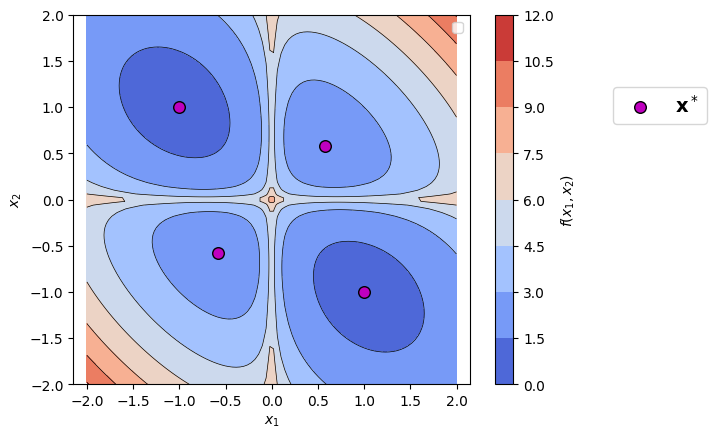

In [54]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

# Problem definition
lb = [-2,-2]
ub = [2, 2]

n_samples = 100
x1 = np.linspace(lb[0],ub[0],n_samples)
x2 = np.linspace(lb[1],ub[1],n_samples)
X1, X2 = np.meshgrid(x1,x2)
F = X1**2 + X1*X2 + X2**2 - np.log(np.abs(X1)) - np.log(np.abs(X2))

# initialize figure
fig, ax = plt.subplots()
cf = ax.contourf(X1, X2, F,cmap=cm.coolwarm,zorder=-1)
ax.contour(X1, X2, F,linestyles="-",colors="k",linewidths=0.5,zorder=-1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.set_xlim((lb[0],ub[0]))
ax.set_ylim((lb[1],ub[1]))
ax.legend()
fig.colorbar(cf, ax=ax, orientation='vertical', label=r"$f(x_1,x_2)$")

handles = []; labels = []

# minimizer
hopt = ax.scatter(X_opt[:,0], X_opt[:,1], s = 70, marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
handles += [hopt]
labels += [r"$\mathbf{x}^*$"]

# legend
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis("equal")
ax.set_xlim((lb[0],ub[0]))
ax.set_ylim((lb[1],ub[1]))
lx = fig.legend(handles, labels, loc="upper right", ncol=1, fontsize = 14, bbox_to_anchor=(1.13, 0.75))
plt.show()